# Simulating interferometric sensing of a quantum superposition of enantiomer states with Qiskit code
## By Alain Chancé
## Coimbatore Institute of Technology Quantum Hackathon 2022 of Qiskit Fall Fest event, 7 October 2022, 5:00 PM IST

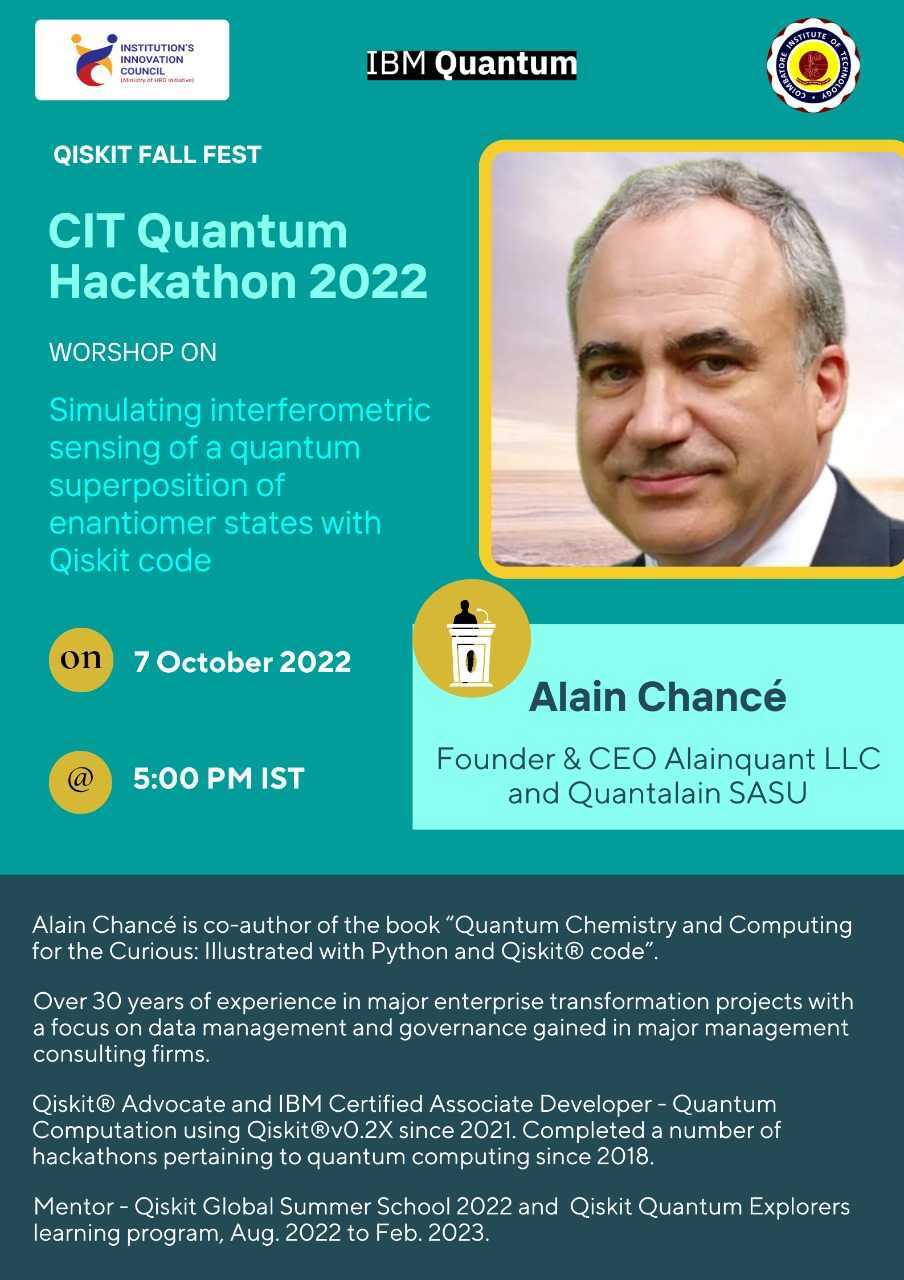

Some code in this Jupyter notebook is derived from the cutdown companion Jupyter Notebook of Chapter 3, Quantum Circuit Model of Computation, of the book titled:
"Quantum Chemistry and Computing for the Curious: Illustrated with Python and Qiskit® code" [Sharkey] which is published on the following public GitHub repository:
https://github.com/PacktPublishing/Quantum-Chemistry-and-Computing-for-the-Curious/blob/main/Chapter_03_Quantum_circuit_model_of_computation.ipynb

The following MIT license only applies to the code, and not to the text and images. The author is not granting a license to replicate or reuse the text and images in this Jupyter notebook.

# MIT License

Copyright (c) 2022 Packt

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.



## Test if notebook is running on Google Colab
https://stackoverflow.com/questions/53581278/test-if-notebook-is-running-on-google-colab

In [1]:
RunningInCOLAB = 'google.colab' in str(get_ipython())
print(RunningInCOLAB)

False


## Updating Python version when running on Google Colab

In [2]:
if RunningInCOLAB:
  !sudo apt-get update -y
  !sudo apt-get install python3.8

## Installing NumPy, and Qiskit and importing various modules
Install NumPy with the following command:

In [3]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Install Qiskit with the following command:

In [4]:
pip install qiskit

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Install Qiskit visualization support with the following command:

In [5]:
pip install 'qiskit[visualization]'

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Install qiskit.utils with the following command:

In [6]:
pip install qiskit.utils

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Installing the 'qiskit-aer' library to use 'Aer provider'

In [7]:
pip install qiskit-aer

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Installing QuTiP with the following command:

In [8]:
pip install qutip

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Install PySCF with the following command:

In [9]:
pip install pyscf

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Install ASE with the following command:

In [10]:
pip install ase

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Install PubChemPy which provides a way to interact with PubChem in Python with the following command:

In [11]:
pip install pubchempy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Install the plotly Python library, an interactive, open-source plotting library that supports over 40 unique chart types covering a wide range of statistical, financial, geographic, scientific, and 3-dimensional use-cases, with the following command:

In [12]:
pip install plotly==5.10.0

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Import NumPy with the following command:

In [13]:
import numpy as np

Import the required functions and class methods. The array_to_latex function() returns a LaTeX representation of a complex array with dimension 1 or 2:

In [14]:
from qiskit.visualization import array_to_latex, plot_bloch_vector, plot_bloch_multivector, plot_state_qsphere, plot_state_city
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit import execute, Aer
import qiskit.quantum_info as qi
from qiskit.extensions import Initialize

In [15]:
from pyscf import gto, scf

Import the ASE libraries, the Atoms object, molecular data, and visualizations with the following commands:

In [16]:
from ase import Atoms
from ase.build import molecule, attach
from ase.visualize import view
from ase.collections import g2

In [17]:
# https://wiki.fysik.dtu.dk/ase/ase/data.html
# https://pyqmc.readthedocs.io/en/documentation/tutorial.html
from ase.data.pubchem import pubchem_atoms_search, pubchem_conformer_search 
import pyscf.pbc.tools.pyscf_ase as pyscf_ase

Import PubChemPy

In [18]:
import pubchempy as pcp

Import Plotly Express

In [19]:
import plotly.express as px

In [20]:
# Plotly plots not working in Jupyterlab #2672
# https://github.com/plotly/plotly.py/issues/2672#issuecomment-826271731
if not(RunningInCOLAB):
  import plotly.io as pio
  pio.renderers.default='iframe'

Import the math libraries with the following commands:

In [21]:
import cmath
import math

Import QuTiP with the following command:

In [22]:
import qutip

Import Matplotib

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Enantiomers
In chemistry, molecules or ions that are mirror images of each other are called enantiomers or optical isomers. If these images are non-superimposable, they are called chiral molecules [ChemChiral] and they differ in their ability to rotate plane polarized light either to the left or to the right [Wonders]. One is called the (S) enantiomer, and the other the (R) enantiomer. The (R) and (S) assignments are designated via the Cahn-Ingold-Prelog convention. 

Optically active compounds which rotate plane polarized light clockwise (dextrorotatory) are designated (+) or d.

Optically active compounds which rotate plane polarized light counterclockwise (levorotatory) are designated (-) or l.

There is no relationship between (R) and (S) and the direction of the rotation of plane polarized light. 

## (S)-Alanine and (R)-alanine
In the following figure, the naturally occurring amino acid, (S)-Alanine is depicted on the left, and its enantiomer (R)-alanine is on the right [Wade].

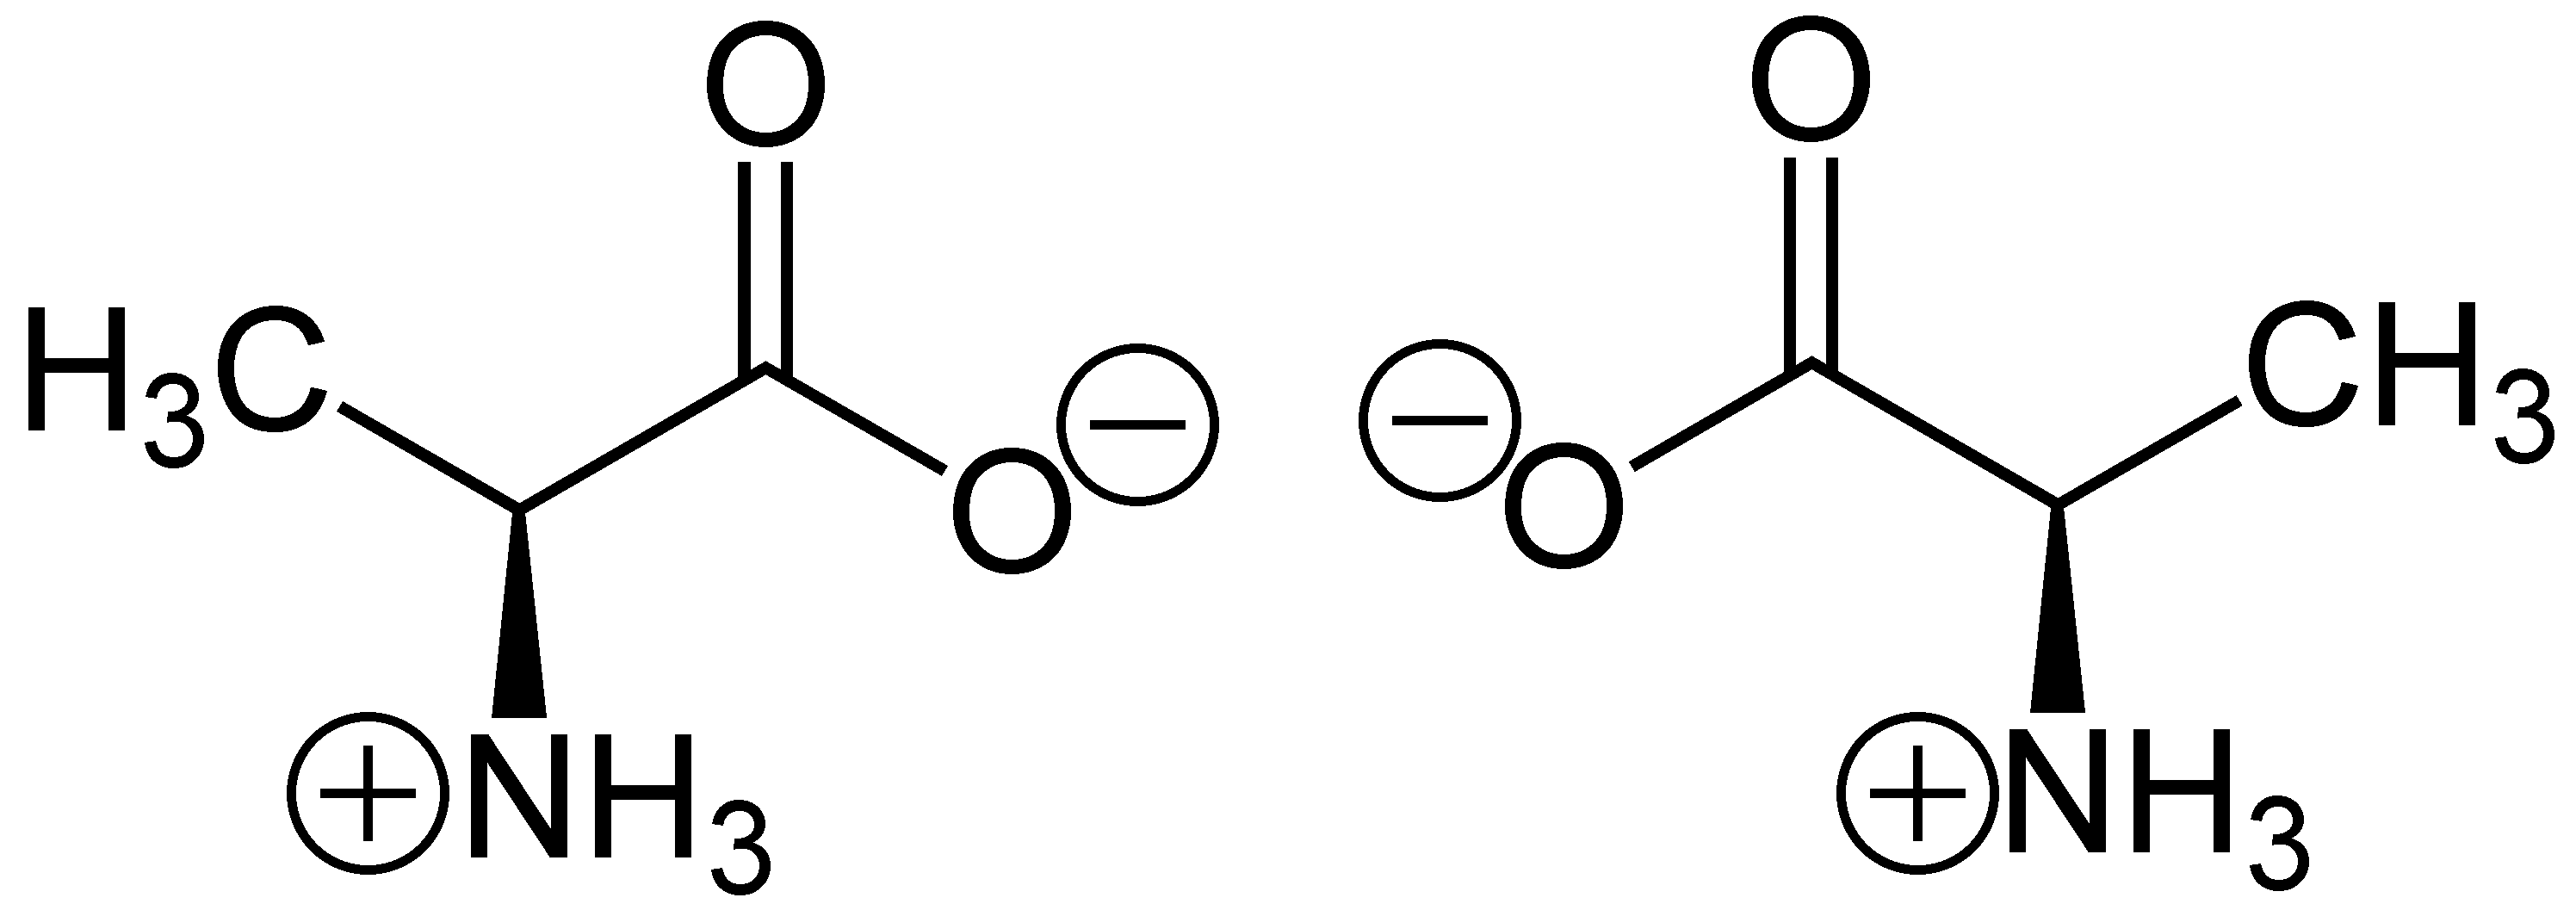

(S)-Alanine (left) and (R)-alanine (right) in zwitterionic form at neutral pH, Jü, Public domain, via Wikimedia Commons
https://upload.wikimedia.org/wikipedia/commons/4/4a/Zwitterion-Alanine.png

## Creating a function plot_mol3D() that plots a 3D view of a molecule retrieved from PubChem
PubChem is a free and publicly available resource containing substance descriptions and their associated biological activity information.

(S)-Alanine = L-analine: https://pubchem.ncbi.nlm.nih.gov/compound/Alanine 

(R)-Alanine = D-analine: https://pubchem.ncbi.nlm.nih.gov/compound/D-alanine

In [24]:
# Plot 3D view of a molecule retrieved from PubChem with PubChemPy get_compounds()
def plot_mol3D(molecule):
  fig = plt.figure(figsize = (6, 7))
  ax = plt.axes(projection ="3d")

  for compound in molecule:
    atoms = compound.atoms
    print(atoms)
    
    info = compound.record
    element_id = info['atoms']['element']
    coords = info['coords'][0]['conformers'][0]

    l = len(element_id)
    xs = [0]*l
    ys = [0]*l
    zs = [0]*l
    colour = [0]*l
    size = [0]*l

    # https://matplotlib.org/stable/gallery/color/named_colors.html
    # Create a dictionary to assign colors to atoms in MatplotLib
    # Oxygen in red, Nitrogen in blue, Carbon in black, Hydrogen in orange
    dict_col = {8:'r', 7:'b', 6:'k', 1:'orange'}
    dict_size = {8:300, 7: 300, 6:300, 1:200}

    for k in range(len(element_id)):
      colour[k] = dict_col[element_id[k]]
      size[k] = dict_size[element_id[k]]

    xs, ys, zs = [coords[axis] for axis in 'xyz']  
    ax.scatter3D(xs, ys, zs, c = colour, s = size, marker ='o')

    ax.set_xlabel('x-axis', fontweight ='bold')
    ax.set_ylabel('y-axis', fontweight ='bold')
    ax.set_zlabel('z-axis', fontweight ='bold')

    # show plot
    print("Oxygen in red, Nitrogen in blue, Carbon in black, Hydrogen in orange")
    plt.show()

    # show 3D scatter plot with Plotly Express
    # https://plotly.com/python/discrete-color/
    fig = px.scatter_3d(x = xs, y = ys, z = zs, color = colour, color_discrete_sequence=["red", "blue", "black", "orange"])
    fig.show()

  return xs, ys, zs, colour

## Plotting a 3D view of (S)-Alanine = L-alanine

Plotting a 3D view of (S)-Alanine = L-alanine
[Atom(1, O), Atom(2, O), Atom(3, N), Atom(4, C), Atom(5, C), Atom(6, C), Atom(7, H), Atom(8, H), Atom(9, H), Atom(10, H), Atom(11, H), Atom(12, H), Atom(13, H)]
Oxygen in red, Nitrogen in blue, Carbon in black, Hydrogen in orange


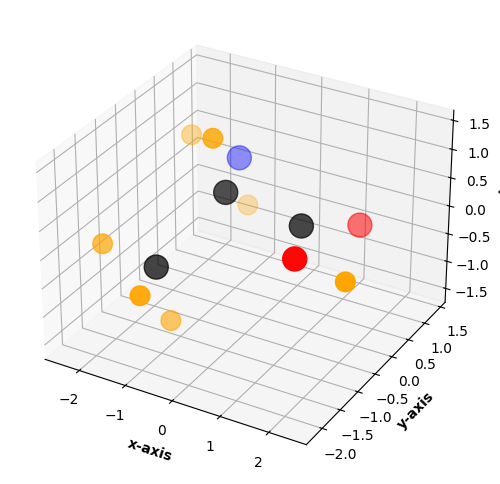

In [25]:
print("Plotting a 3D view of (S)-Alanine = L-alanine")
l_alanine = pcp.get_compounds('l-alanine', 'name', record_type='3d')
xl, yl, zl, colour = plot_mol3D(l_alanine)

Display a 3D view of of (S)-Alanine = L-alanine with the ASE viewer X3D for Jupyter notebooks [ASE_2]

In [26]:
l_alanine1 = pubchem_atoms_search(name='l-alanine')
view(l_alanine1, viewer='x3d')

/home/jupyter-alain/.local/lib/python3.9/site-packages/ase/data/pubchem.py:79: UserWarning:

The structure "l-alanine" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function



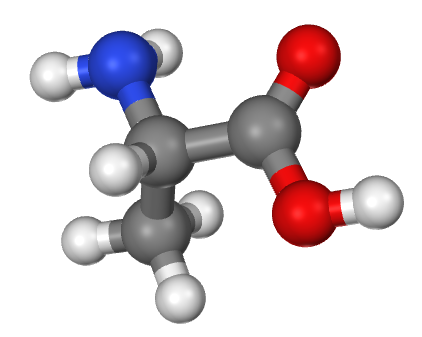

Source: Model ID 3DPX-001257, L-alanine, US Department of Health and Human Services, National Institutes of Health (NIH), https://3dprint.nih.gov/discover/3dpx-001257, Public domain

## Plotting a 3D view of (R)-Alanine = D-alanine

Plotting a 3D view of (R)-Alanine = D-alanine
[Atom(1, O), Atom(2, O), Atom(3, N), Atom(4, C), Atom(5, C), Atom(6, C), Atom(7, H), Atom(8, H), Atom(9, H), Atom(10, H), Atom(11, H), Atom(12, H), Atom(13, H)]
Oxygen in red, Nitrogen in blue, Carbon in black, Hydrogen in orange


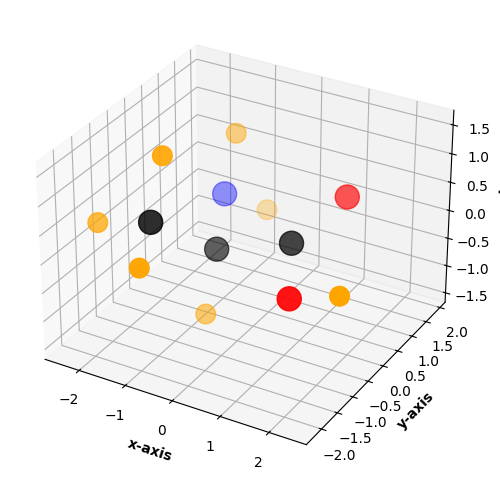

In [27]:
print("Plotting a 3D view of (R)-Alanine = D-alanine")
d_alanine = pcp.get_compounds('d-alanine', 'name', record_type='3d')
xd, yd, zd, colour = plot_mol3D(d_alanine)

Display a 3D view of of (R)-Alanine = D-alanine with the ASE viewer X3D for Jupyter notebooks [ASE_2]

In [28]:
d_alanine1 = pubchem_atoms_search(name='d-alanine')
view(d_alanine1, viewer='x3d')

/home/jupyter-alain/.local/lib/python3.9/site-packages/ase/data/pubchem.py:79: UserWarning:

The structure "d-alanine" has more than one conformer in PubChem. By default, the first conformer is returned, please ensure you are using the structure you intend to or use the `ase.data.pubchem.pubchem_conformer_search` function



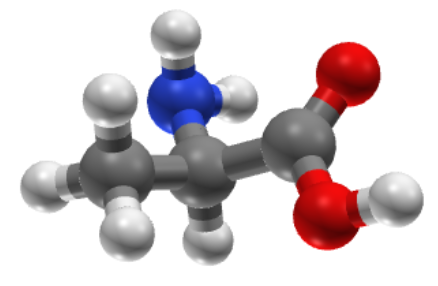

Source: Model ID 3DPX-015280, D-alanine, US Department of Health and Human Services, National Institutes of Health (NIH), https://3dprint.nih.gov/discover/3DPX-015280, Public domain


## Preparing a quantum superposition of left- and right-handed states of enantiomers

Researchers have proposed an experiment to prepare a quantum superposition of left- and right-handed states of enantiomers. Performing interferometric sensing of chirality-dependent forces could be used to measure enantiomer-dependent forces due to nearby surfaces, other chiral molecules, or optical fields with unprecedented accuracy [Stickler]. 

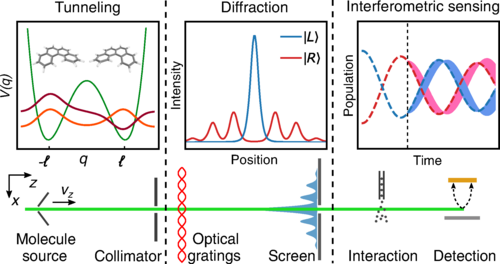

Proposed setup to generate quantum superpositions of enantiomers and exploit their tunneling dynamics for interferometric sensing. A racemic beam of chiral molecules is diffracted from optical gratings and filtered at the detection screen. Left inset: During the transit, the molecules continuously tunnel between left- and right-handed molecular configurations. Middle inset: Adjusting the grating phases prepares superpositions of enantiomer states. Right inset: The resulting tunneling dynamics can be observed and exploited in subsequent beam experiments. Source: Benjamin A. Stickler, Mira Diekmann, Robert Berger, and Daqing Wang, Phys. Rev. X 11, 031056, DOI:https://doi.org/10.1103/PhysRevX.11.031056, Figure 1, 14 September 2021, Creative Commons Attribution 4.0 International license.

A racemic mixture is a 50:50 mixture of two enantiomers [Racemic].

# Qubits and quantum gates
## Qubits
A qubit is a quantum unit of information that represents a two-level quantum system and lives in a two-dimensional Hilbert space $\mathbb C^2$. The computational basis states of the quantum space are denoted as $\{|0\rangle,|1\rangle\}$:

$$|0\rangle=\left(\begin{array}{l}
1 \\
0
\end{array}\right) 
|1\rangle=\left(\begin{array}{l}
0 \\
1
\end{array}\right)$$

Any single-qubit state is described by a linear superposition of the computational basis with complex coefficients:  
$$|\psi\rangle=\alpha|0\rangle+\beta|1\rangle=\left(\begin{array}{l}
\alpha \\
\beta
\end{array}\right) \in \mathbb{C}^{2}$$

where 𝛼 and 𝛽 satisfy:
$$|\alpha|^{2}+|\beta|^{2}=1$$

A qubit is in a quantum superposition during the execution of an algorithm.  When it is measured in the computational basis, a qubit will be found in either state $|0\rangle$ or in state $|1\rangle$ with probability $|\alpha|^{2}$ and $|\beta|^{2}$ respectively. If there are $n$ qubits in the system, the state is described by a vector in the $2^n$ dimensional Hilbert space $(\mathbb{C}^2)^{⊗n}$ formed by taking the tensor product of the Hilbert spaces of the individual qubits. For example, for 10 qubits, the state is described by a vector in a 1024-dimensional Hilbert space. 

## Tensor ordering of qubits
The physics community typically orders a tensor product of $n$ qubits with the first qubit on the left-most side of the tensor product: 

$$|q\rangle=\left|q_{0}\right\rangle\left|q_{1}\right\rangle \ldots\left|q_{n-1}\right\rangle=\left|q_{0}, q_{1}, \ldots, q_{n-1}\right\rangle=\bigotimes_{i=0}^{n-1}\left|q_{i}\right\rangle$$

However, Qiskit uses an ordering in which the $n^{th}$ qubit is first in the order and the $0^{th}$ qubit is last:

$$|q\rangle=
\left|q_{n-1}\right\rangle\ldots\left|q_{1}\right\rangle\left|q_{0}\right\rangle
=\left|q_{n-1}, \ldots, q_{1}, q_{0}\right\rangle
=\bigotimes_{i=n-1}^{0}\left|q_{i}\right\rangle$$

In other words, if qubit $0$ is in state $|0\rangle$, qubit $1$ is in state $|0\rangle$, and qubit 2 is in state $|1\rangle$, the state represented in many physics textbooks as $|001\rangle$ is represented by Qiskit as $|100\rangle$. This difference affects the way multi-qubit operations are represented as matrices.

## Single qubit quantum gates
A single qubit quantum gate $U$ has a $(2\times2)$ unitary matrix form: $U^\dagger U=UU^\dagger= 1$.

### X Gate
An X gate maps $|0\rangle$ to $|1\rangle$ and $|1\rangle$ to $|0\rangle$. For classical computing, the NOT gate changes a 0 to a 1 and a 1 to a 0.

$$X = \begin{pmatrix}
0 & 1 \\
1 & 0 \\
\end{pmatrix}$$

### H Gate
A Hadamard gate maps the basis state $|0\rangle$ to $\frac{|0\rangle + |1\rangle}{\sqrt{2}}$ which is also written as $|+\rangle$ and $|1\rangle$ to $\frac{|0\rangle - |1\rangle}{\sqrt{2}}$ which is also written as $|-\rangle$. A measurement of the state $|+\rangle$ or of the state $|-\rangle$ will have equal probabilities of being $0$ or $1$, creating a superposition of states.

$$H = \frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 1 \\
1 & -1 \\
\end{pmatrix}$$

## Two qubits quantum gates
A two qubits gate $U$ has a 4x4 unitary matrix form, $U^\dagger U=UU^\dagger= 1$.

### Controlled Not (CNOT, CX) Gate

If the first qubit is |1⟩ it performs the Pauli-X (NOT) operation on the second qubit, otherwise it leaves it unchanged

With the tensor ordering of qubits used in most physics textbooks:

$$CX = \begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \end{pmatrix}$$

With Qiskit tensor ordering of qubits:

$$CX = \begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\
\end{pmatrix}$$

Let's check this result with the unitary simulator:

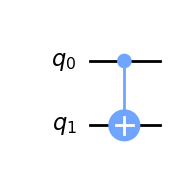

<IPython.core.display.Latex object>

In [29]:
q = QuantumRegister(2, 'q') # register of 2 qubits
qc = QuantumCircuit(q)

qc.cx(q[0], q[1]) # Perform a controlled not on qubit q1 using q0 as control qubit
display(qc.draw(output='mpl'))

# Selecting the unitary_simulator
backend = Aer.get_backend('unitary_simulator')

# Executing the job and getting the result as an object
job = execute(qc, backend)
result = job.result()

# Getting the unitary matrix from the result object
U = result.get_unitary(qc, decimals=2)
array_to_latex(U, prefix="\\text{CX} = ", precision = 2)

# Designing with Qiskit a quantum circuit inspired by the interferometer involving enantiomers
## Encoding enantiomer states
We represent a single enantiomer with two qubits:
- the handedness qubit $|q_0\rangle$
- the direction of propagation qubit $\left|q_{1}\right\rangle$

### Handedness qubit $|q_0\rangle$
We encode the following:

$$\begin{array}{|c|c|}
\hline
\text{State } |q_0\rangle&\text{Handedness}\\
\hline
|0\rangle&\text{left}\\
\hline
|1\rangle&\text{right}\\
\hline
|+\rangle=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)&\text{superposition of left- and right-handed}\\
\hline
\end{array}$$

### Direction of propagation qubit $\left|q_{1}\right\rangle$
We encode the direction of propagation as follows:

$$\begin{array}{|c|c|}
\hline
\text{State } |q_1\rangle&\text{Direction}\\
\hline
|0\rangle&\text{horizontal}\\
\hline
|1\rangle&\text{vertical}\\
\hline
|+\rangle=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)&\text{superposition of horizontal and vertical}\\
\hline
\end{array}$$

### Computational basis states
The following table shows the meaning of each computational basis state:

$$\begin{array}{|c|c|c|c|c|}
\hline
\text{State } |q_1q_0\rangle&|q_0\rangle&\text{Handedness}&|q_1\rangle&\text{Direction}\\
\hline
|00\rangle&0&\text{left}&0&\text{horizontal}\\
\hline
|01\rangle&1&\text{right}&0&\text{horizontal}\\
\hline
|10\rangle&0&\text{left}&1&\text{vertical}\\
\hline
|11\rangle&1&\text{right}&1&\text{vertical}\\
\hline
\end{array}$$

### Defining a function show() which displays the drawing of a quantum circuit and the state vector
We define the show() function, which displays the drawing of a quantum circuit and the state of the state vector using LaTex, as follows:

In [30]:
def show(qc):
  display(qc.draw(output='mpl'))
  s = qi.Statevector.from_instruction(qc)
  display(array_to_latex(s, prefix="\\text{state vector} = ", precision = 2))
  return

## Simulating interactions of enantiomers with a beam splitter
### Simulating a beam splitter
We simulate a mirror by the Pauli $\sigma_x$ matrix and a beam splitter by the matrix $1/√2 (1 + i\sigma_x)$ [Rioux]:

$$\sigma_x = \begin{pmatrix}
0 & 1 \\
1 & 0 \\
\end{pmatrix}
$$

$$\frac{1}{\sqrt{2}}\left(\mathbb{1}+i \sigma_{x}\right)=\frac{1}{\sqrt{2}}\left(\left(\begin{array}{ll}
1 & 0 \\
0 & 1
\end{array}\right)+i\left(\begin{array}{ll}
0 & 1 \\
1 & 0
\end{array}\right)\right)=\frac{1}{\sqrt{2}}\left(\begin{array}{ll}
1 & i \\
i & 1
\end{array}\right)$$

By convention, a phase shift of $\pi/2$ is assigned to reflection. From the preceding unitary matrix, we create a beam splitter gate named BS with the following Qiskit code:

In [31]:
from qiskit.extensions import UnitaryGate
BS = 1/np.sqrt(2) * np.array([[1,1j],[1j,1]])
BS = UnitaryGate(BS,'BS')

### Enantiomer moving horizontally

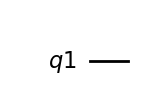

<IPython.core.display.Latex object>

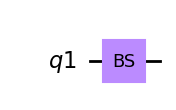

<IPython.core.display.Latex object>

In [32]:
q = QuantumRegister(1, 'q1') # register of 1 qubits
# q1 direction of propagation qubit, |0⟩ horizontal, |1⟩ vertical
qc = QuantumCircuit(q)

show(qc)

qc.append(BS, q)
show(qc)

The enantiomer moving horizontally, represented by $\left|q_{1}\right\rangle=|0\rangle$ has been put by the beam splitter in the state $|q_{1}\rangle=\frac{1}{\sqrt{2}}(|0\rangle+i|1\rangle)$, a superposition of the states moving horizontally and moving vertically with a phase shift of $\pi/2$.

### Enantiomer moving vertically

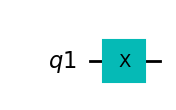

<IPython.core.display.Latex object>

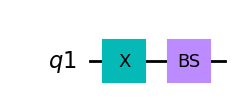

<IPython.core.display.Latex object>

In [33]:
q = QuantumRegister(1, 'q1') # register of 1 qubits
# q1 direction of propagation qubit, |0⟩ horizontal, |1⟩ vertical
qc = QuantumCircuit(q)
qc.x([0]) # Moving vertically

show(qc)

qc.append(BS, q)
show(qc)

The enantiomer moving vertically, represented by $\left|q_{1}\right\rangle=|1\rangle$ has been put by the beam splitter in the state $|q_{1}\rangle=\frac{1}{\sqrt{2}}(i|0\rangle+|1\rangle)$, a superposition of the states moving horizontally with a phase shift of $\pi/2$ and moving vertically.

## Simulating interactions of enantiomers with a polarizing beam splitter
### Simulating a polarizing beam splitter
We simulate a polarizing beam splitter (PBS) which transmits left-handed and reflects right-handed states with the matrix PBS [Rioux].

$$PBS = \begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\
\end{pmatrix}$$

Unlike the beam splitter, there is no phase change on reflection. From the preceding unitary matrix, we create a polarizing beam splitter gate named PBS with the following Qiskit code:

In [34]:
PBS = np.array([[1,0,0,0],[0,0,0,1],[0,0,1,0],[0,1,0,0]])
PBS = UnitaryGate(PBS,'PBS')

The PBS gate is the same as the controlled Not (CNOT, CX) Gate using Qiskit tensor ordering of qubits.

### Enantiomer moving horizontally and in the left-handed state
We simulate the action of a polarizing beam splitter on an enantiomer moving horizontally and in the left-handed state with the following Qiskit code:

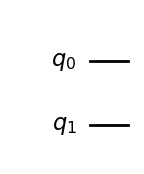

<IPython.core.display.Latex object>

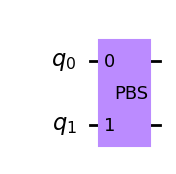

<IPython.core.display.Latex object>

In [35]:
q = QuantumRegister(2, 'q') # register of 2 qubits
# q[0] handedness qubit,|0⟩ left-handed, |1⟩ right-handed
# q[1] direction of propagation qubit, |0⟩ horizontal, |1⟩ vertical
qc = QuantumCircuit(q)

show(qc)

qc.append(PBS, q)
show(qc)

The enantiomer moving horizontally and in the left handed state, represented by $|q_1q_0\rangle=|00\rangle$, using Qiskit tensor ordering of qubits, has been transmitted in the horizontal direction of propagation by the polarizing beam splitter, represented by $|q_1q_0\rangle=|00\rangle$.

### Enantiomer moving horizontally and in the right-handed state

We simulate the action of a polarizing beam splitter on an enantiomer moving horizontally and in the right-handed state with the following Qiskit code:

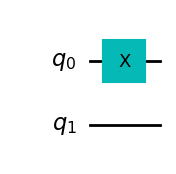

<IPython.core.display.Latex object>

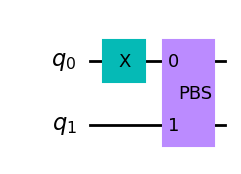

<IPython.core.display.Latex object>

In [36]:
q = QuantumRegister(2, 'q') # register of 2 qubits
# q[0] handedness qubit,|0⟩ left-handed, |1⟩ right-handed
# q[1] direction of propagation qubit, |0⟩ horizontal, |1⟩ vertical
qc = QuantumCircuit(q)

qc.x([0]) # Right-handed
show(qc)

qc.append(PBS, q)
show(qc)

The enantiomer moving horizontally and in the right handed state, represented by $|q_1q_0\rangle=|01\rangle$, using Qiskit tensor ordering of qubits, has been reflected in the vertical direction of propagation by the polarizing beam splitter, represented by $|q_1q_0\rangle=|11\rangle$.

### Enantiomer moving horizontally and in a superposition of left- and right-handed states
We simulate the action of a polarizing beam splitter on an enantiomer moving horizontally and in a superposition of left- and right-handed states with the following Qiskit code.

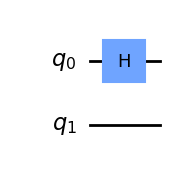

<IPython.core.display.Latex object>

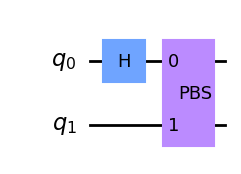

<IPython.core.display.Latex object>

In [37]:
q = QuantumRegister(2, 'q') # register of 2 qubits
# q[0] handedness qubit,|0⟩ left-handed, |1⟩ right-handed
# q[1] direction of propagation qubit, |0⟩ horizontal, |1⟩ vertical
qc = QuantumCircuit(q)

qc.h(q[0]) # Put enantiomer in a superposition of left- and right-handed states
show(qc)

qc.append(PBS, q)
show(qc)

The enantiomer moving horizontally and in a superposition of the left- and right-handed states, represented by $\left|q_{1} q_{0}\right\rangle=|0\rangle \otimes \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)=\frac{1}{\sqrt{2}}(|00\rangle+|01\rangle)$, using Qiskit tensor ordering, has been put by the polarizing beam splitter in the Bell state $|q_1q_0\rangle=|\Phi+\rangle=\frac{1}{\sqrt{2}}(|00\rangle+|11\rangle)$, a superposition of left-handed, moving horizontally and right-handed, moving vertically states, thereby achieving interferometric sensing. An equivalent quantum circuit follows:

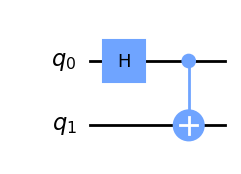

<IPython.core.display.Latex object>

In [38]:
q = QuantumRegister(2, 'q') # register of 2 qubits
# q[0] handedness qubit,|0⟩ left-handed, |1⟩ right-handed
# q[1] direction of propagation qubit, |0⟩ horizontal, |1⟩ vertical
qc = QuantumCircuit(q)

qc.h(q[0]) # Put enantiomer in a superposition of left- and right-handed states
qc.cx(q[0], q[1])
show(qc)

### Enantiomer in a superposition of left-handed, moving horizontally and right-handed, moving vertically states
We now simulate the action of a polarizing beam splitter on an enantiomer in the state obtained in the previous experiment.

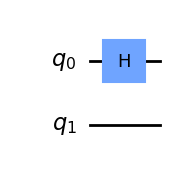

<IPython.core.display.Latex object>

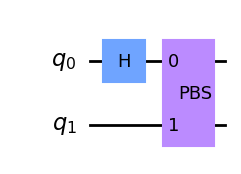

<IPython.core.display.Latex object>

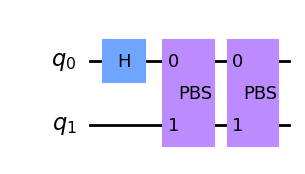

<IPython.core.display.Latex object>

In [39]:
q = QuantumRegister(2, 'q') # register of 2 qubits
# q[0] handedness qubit,|0⟩ left-handed, |1⟩ right-handed
# q[1] direction of propagation qubit, |0⟩ horizontal, |1⟩ vertical
qc = QuantumCircuit(q)

qc.h(q[0]) # Put enantiomer in a superposition of left- and right-handed states
show(qc)

qc.append(PBS, q)
show(qc)

qc.append(PBS, q)
show(qc)

The enantiomer in the Bell state $|q_1q_0\rangle=|\Phi+\rangle=\frac{1}{\sqrt{2}}(|00\rangle+|11\rangle)$, a superposition of left-handed, moving horizontally and right-handed, moving vertically, has been put by the polarizing beam splitter back in the state moving horizontally and in a superposition of the left- and right-handed states, represented by $\left|q_{1} q_{0}\right\rangle=|0\rangle \otimes \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)=\frac{1}{\sqrt{2}}(|00\rangle+|01\rangle)$, using Qiskit tensor ordering.

# References
[ASE_0] Atomic Simulation Environment (ASE), https://wiki.fysik.dtu.dk/ase/index.html 

[ASE_1] ASE, The Atoms object, https://wiki.fysik.dtu.dk/ase/ase/atoms.html 

[ASE_2] ASE Visualization, https://wiki.fysik.dtu.dk/ase/ase/visualize/visualize.html#module-ase.visualize 

[ChemChiral] 5.1 Chiral Molecules, Chemistry LibreTexts, 5 Jul 2015, https://chem.libretexts.org/Bookshelves/Organic_Chemistry/Map%3A_Organic_Chemistry_(Vollhardt_and_Schore)/05._Stereoisomers/5.1%3A_Chiral__Molecules 

[Crockett] Christopher Crockett, Superpositions of Chiral Molecules, September 14, 2021, Physics 14, s108, https://physics.aps.org/articles/v14/s108

[Deepdata] Structure of D-alanine (C3H7NO2), https://www.molinstincts.com/structure/D-alanine-cstr-CT1002570990.html

[Kimball] Kimball's Biology Pages, Enantiomers (Optical Isomers), https://www.biology-pages.info/E/Enantiomers.html

[Loscrı́] Loscri, V. & Vegni, Anna Maria. (2021). Enabling molecular communication through chirality of enantiomers. ITU Journal on Future and Evolving Technologies. 2. 10.52953/UOGH5898. https://www.researchgate.net/publication/352670553_Enabling_molecular_communication_through_chirality_of_enantiomers

[NIH_1] Model ID 3DPX-001257, L-alanine, US Department of Health and Human Services, National Institutes of Health (NIH), https://3dprint.nih.gov/discover/3dpx-001257

[NIH_2] Model ID 3DPX-015280, D-alanine, US Department of Health and Human Services, National Institutes of Health (NIH), https://3dprint.nih.gov/discover/3DPX-015280

[ORCA] Calculating the optimized geometry of the amino acid alanine, https://www.orcasoftware.de/tutorials_orca/prop/geoopt.html

[Plotly] Getting Started with Plotly in Python, https://plotly.com/python/getting-started/

[PubChem_1] D-alanine, https://pubchem.ncbi.nlm.nih.gov/compound/71080

[PubChemPy] pubChemPy, https://pubchempy.readthedocs.io/en/latest/

[Qiskit] Qiskit, https://qiskit.org/ 

[QuTiP] QuTiP, Plotting on the Bloch Sphere, https://qutip.org/docs/latest/guide/guide-bloch.html 

[Racemic] 4.7: Optical Activity and Racemic Mixtures, Chemistry LibreTexts, Sep 4, 2019, https://chem.libretexts.org/Courses/Nassau_Community_College/Organic_Chemistry_I_and_II/04%3A_Stereochemistry_at_Tetrahedral_Centers/4.07%3A_Optical_Activity_and_Racemic_Mixtures

[Rioux] Frank Rioux, Mach-Zehnder Polarizing Interferometer Analyzed Using Tensor Algebra, https://faculty.csbsju.edu/frioux/photon/MZ-Polarization.pdf 

[Sharkey] Sharkey, Keeper L., and Chancé, Alain. 2022. Quantum Chemistry and Computing for the Curious: Illustrated with Python and Qiskit Code. Packt, Pub. ISBN-13: 978-1803243900

[Stickler] B. A. Stickler et al., Enantiomer superpositions from matter-wave interference of chiral molecules, Phys. Rev. X 11, 031056 (2021), https://journals.aps.org/prx/abstract/10.1103/PhysRevX.11.031056 

[Wade] Organic chemistry 6th edition, L.G. Wade Jr., Chapter 5 Stereochemistry, https://crab.rutgers.edu/~alroche/Ch05.pdf , https://slideplayer.com/slide/5152710/

[Wiki_1] Alanine, https://en.wikipedia.org/wiki/Alanine
Space-filling model of the zwitterionic L-alanine molecule, C3H7NO2, as found in the crystal structure determined by neutron diffraction and reported in New J. Chem. (2005) 29 1318-1322 (CSD Entry: LALNIN23). Public domain. https://en.wikipedia.org/wiki/Alanine#/media/File:L-alanine-from-xtal-Mercury-3D-sf.png

[Wonders] Optical Isomers, Enantiomers and Chiral Molecules, WondersofChemistry, https://www.youtube.com/watch?v=8TIZdWR4gIU

# Trademarks

- Atomic Simulation Environment (ASE), is copyright © 2022, ASE-developers.
- Google Colab is copyright© 2017, COLAB, LLC.
- h5py, a thin, Pythonic wrapper around HDF5, which runs on Python 3 (3.6+), is copyright © 2008 Andrew Collette and contributors.
- IBM®, IBM Q Experience®, and Qiskit® are registered trademarks of IBM Corporation.
- Linux is the registered trademark of Linus Torvalds in the U.S. and other countries.
- Plotly, an interactive, open-source plotting library that supports over 40 unique chart types covering a wide range of statistical, financial, geographic, scientific, and 3-dimensional use-cases is free and open-source software, licensed under the MIT license.
- Psi4, an open-source quantum chemistry software package is copyright © 2007-2022, The Psi4 Developers.
- PubChemPy provides a way to interact with PubChem in Python and is copyright © 2014, Matt Swain.
- pyQMC, a Python module that implements real-space quantum Monte Carlo techniques, is copyright © 2019, Lucas K Wagner, pyQMC authors
- PySCF, the Python-based simulations of chemistry framework is copyright © 2014, the PySCF developers
- Python is copyright © 2001-2022 Python Software Foundation.
- The Python logo is trademark of the Python Software Foundation: https://www.python.org/community/logos/.
- QuTiP, Quantum Toolbox in Python, is Copyright © 2011 to 2021 inclusive, QuTiP developers and contributors.
- SciPy, an open-source software for mathematics, science, and engineering, is copyright © 2001-2002 Enthought, Inc. and 2003-2022, SciPy developers.
- SymPy is copyright © 2021, SymPy Development Team.
- The NumPy trademark is registered with the U.S. Patent & Trademark Office (USPTO).
- The Jupyter trademark is registered with the U.S. Patent & Trademark Office (USPTO).

In [40]:
# Display Qiskit Software and System information
import qiskit.tools.jupyter
%qiskit_version_table